# Continual learning on a Gaussian mixture model

Here we give an example that EWC can (but must not) fail if it doesn't approximate the Hessian well. 

In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

XA: [[ 1.  -0.8  0.8]
 [-1.   0.8 -0.8]]
yA: [ 1 -1]
Hessian used: [[1.05 0.   0.  ]
 [0.   0.69 0.  ]
 [0.   0.   0.69]]
optimal lambda: 2.6968806263906924
optimal theta: [ 0.06637073 -0.06640115 -0.09437624] 0.4711351431051579
risks: 0.5000747051564977 0.994660034242113


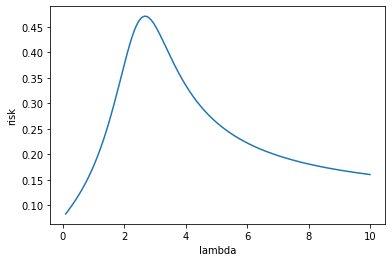

In [2]:
# construct a problem instance
d = 3
sigma = 0.05

mua = np.array( [1,-0.8,0.8] )
XA = np.array( [mua,-mua])
yA = np.array([1,-1])

mub = np.array( [-1,0.5,-0.8] )
XB = np.array( [mub,-mub])
yB = np.array([1,-1])

print("XA:", XA)
print("yA:", yA)
Hessian = 0.5*XA.T @ XA + sigma*np.eye(d)

thetaA = np.linalg.inv(0.5*XA.T @ XA + sigma*np.eye(d)) @ ( 0.5*XA.T @ yA ).T
thetaB = np.linalg.inv(0.5*XB.T @ XB + sigma*np.eye(d)) @ ( 0.5*XB.T @ yB ).T

# construct the optimal estimator
lam = 1
H = Hessian
thetaast = np.linalg.inv(0.5*XB.T @ XB + sigma*np.eye(d) + lam*H ) @ ( 0.5*XB.T @ yB + lam*H @ thetaA ).T

# function to compute the regularization path
def getpath(H,lams=np.logspace(-1.0, 1.0, num=500)):
    print("Hessian used:", H)
    thetas = []
    for lam in lams:
        theta = np.linalg.inv(0.5*XB.T @ XB + sigma*np.eye(d) + lam*H ) @ ( 0.5*XB.T @ yB + lam*H @ thetaA ).T
        thetas += [theta]
    return np.array(thetas).T

lams=np.logspace(-1.0, 1.0, num=500)
vals = [np.dot(thetaast,theta)/np.linalg.norm(thetaast)/np.linalg.norm(theta)  for theta in getpath(np.diag(np.diag(Hessian)),lams).T ]

hatlam = lams[np.argmax(vals)]

print("optimal lambda:", hatlam)

H = np.diag(np.diag(Hessian))
theta = np.linalg.inv(0.5*XB.T @ XB + sigma*np.eye(d) + hatlam*H ) @ ( 0.5*XB.T @ yB + hatlam*H @ thetaA ).T

print("optimal theta:",theta, np.dot(thetaast,theta)/np.linalg.norm(thetaast)/np.linalg.norm(theta) )

# risk for EWC

def risk(theta):
    ipA = np.dot(theta,mua)/np.linalg.norm(theta)/sigma
    ipB = np.dot(theta,mub)/np.linalg.norm(theta)/sigma
    return 0.5*norm.cdf(ipA) + 0.5*norm.cdf(ipB)

print("risks:", risk(theta) , risk(thetaast) ) 

plt.ylabel("risk")
plt.xlabel("lambda")
plt.plot(lams, vals)
plt.show()

### Visualize the regularization path in 3d

Hessian used: [[1.05 0.   0.  ]
 [0.   0.69 0.  ]
 [0.   0.   0.69]]
Hessian used: [[ 1.05 -0.8   0.8 ]
 [-0.8   0.69 -0.64]
 [ 0.8  -0.64  0.69]]


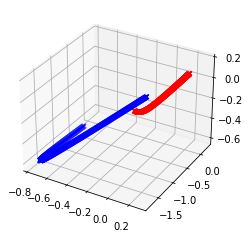

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

thetas = getpath( np.diag(np.diag(Hessian)) )
ax.scatter(thetas[0], thetas[1], thetas[2], c='r', marker='x')

thetas = getpath( Hessian )
ax.scatter(thetas[0], thetas[1], thetas[2], c='b', marker='x')

plt.show()
